In [29]:
import datetime
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
data=pandas.read_csv('./states.csv',parse_dates=['Date'])

In [3]:
data['Tested']=data['Tested'].fillna(0)

In [4]:
data

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-03-26,Andaman and Nicobar Islands,1,0,0,0,0.0
1,2020-03-27,Andaman and Nicobar Islands,6,0,0,0,0.0
2,2020-03-28,Andaman and Nicobar Islands,9,0,0,0,0.0
3,2020-03-29,Andaman and Nicobar Islands,9,0,0,0,0.0
4,2020-03-30,Andaman and Nicobar Islands,10,0,0,0,0.0
...,...,...,...,...,...,...,...
19820,2021-09-07,West Bengal,1553177,1526268,18522,0,17272409.0
19821,2021-09-08,West Bengal,1553928,1527109,18531,0,17313885.0
19822,2021-09-09,West Bengal,1554652,1527867,18539,0,17353215.0
19823,2021-09-10,West Bengal,1555405,1528633,18553,0,17393849.0


In [5]:
data.describe()

,Confirmed,Recovered,Deceased,Other,Tested
count,1.982500e+04,1.982500e+04,19825.000000,19825.000000,1.982500e+04
mean,6.553367e+05,6.116886e+05,8815.272535,242.071122,1.027641e+07
std,2.741818e+06,2.600129e+06,36586.002922,1192.127027,4.040366e+07
min,0.000000e+00,0.000000e+00,0.000000,-1.000000,0.000000e+00
25%,5.147000e+03,4.079000e+03,49.000000,0.000000,1.100680e+05
50%,5.470000e+04,4.585800e+04,744.000000,0.000000,7.879770e+05
75%,3.427860e+05,3.269680e+05,4407.000000,3.000000,7.863864e+06
max,3.323217e+07,3.239613e+07,442688.000000,12891.000000,5.401970e+08


In [6]:
data.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-03-26,Andaman and Nicobar Islands,1,0,0,0,0.0
1,2020-03-27,Andaman and Nicobar Islands,6,0,0,0,0.0
2,2020-03-28,Andaman and Nicobar Islands,9,0,0,0,0.0
3,2020-03-29,Andaman and Nicobar Islands,9,0,0,0,0.0
4,2020-03-30,Andaman and Nicobar Islands,10,0,0,0,0.0


In [7]:
data.tail()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
19820,2021-09-07,West Bengal,1553177,1526268,18522,0,17272409.0
19821,2021-09-08,West Bengal,1553928,1527109,18531,0,17313885.0
19822,2021-09-09,West Bengal,1554652,1527867,18539,0,17353215.0
19823,2021-09-10,West Bengal,1555405,1528633,18553,0,17393849.0
19824,2021-09-11,West Bengal,1556157,1529387,18567,0,17436673.0


In [8]:
correlation_matrix=data.corr()

In [9]:
correlation_matrix

,Confirmed,Recovered,Deceased,Other,Tested
Confirmed,1.000000,0.998700,0.987560,0.881099,0.978278
Recovered,0.998700,1.000000,0.988327,0.880170,0.979210
Deceased,0.987560,0.988327,1.000000,0.879501,0.961824
Other,0.881099,0.880170,0.879501,1.000000,0.857376
Tested,0.978278,0.979210,0.961824,0.857376,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19825 entries, 0 to 19824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       19825 non-null  datetime64[ns]
 1   State      19825 non-null  object        
 2   Confirmed  19825 non-null  int64         
 3   Recovered  19825 non-null  int64         
 4   Deceased   19825 non-null  int64         
 5   Other      19825 non-null  int64         
 6   Tested     19825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 1.1+ MB


In [11]:
mhData=data[data.State=='Maharashtra']

In [12]:
tempData=mhData['Confirmed']-mhData['Recovered']-mhData['Deceased']-mhData['Other']

In [13]:
tempData

11119        2
11120        5
11121       11
11122       14
11123       17
         ...  
11666    47926
11667    47880
11668    50229
11669    49812
11670    49796
Length: 552, dtype: int64

In [14]:
mhData['Active']=tempData

<ipython-input-14-cfad02cb0727>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mhData['Active']=tempData


In [15]:
mhData.sort_values(by='Date')

,Date,State,Confirmed,Recovered,Deceased,Other,Tested,Active
11119,2020-03-09,Maharashtra,2,0,0,0,0.0,2
11120,2020-03-10,Maharashtra,5,0,0,0,0.0,5
11121,2020-03-11,Maharashtra,11,0,0,0,0.0,11
11122,2020-03-12,Maharashtra,14,0,0,0,0.0,14
11123,2020-03-13,Maharashtra,17,0,0,0,0.0,17
...,...,...,...,...,...,...,...,...
11666,2021-09-07,Maharashtra,6493698,6304336,137897,3539,55159364.0,47926
11667,2021-09-08,Maharashtra,6497872,6308491,137962,3539,55338772.0,47880
11668,2021-09-09,Maharashtra,6487025,6295236,138017,3543,55519679.0,50229
11669,2021-09-10,Maharashtra,6491179,6299760,138061,3546,55702628.0,49812


<AxesSubplot:xlabel='Date'>

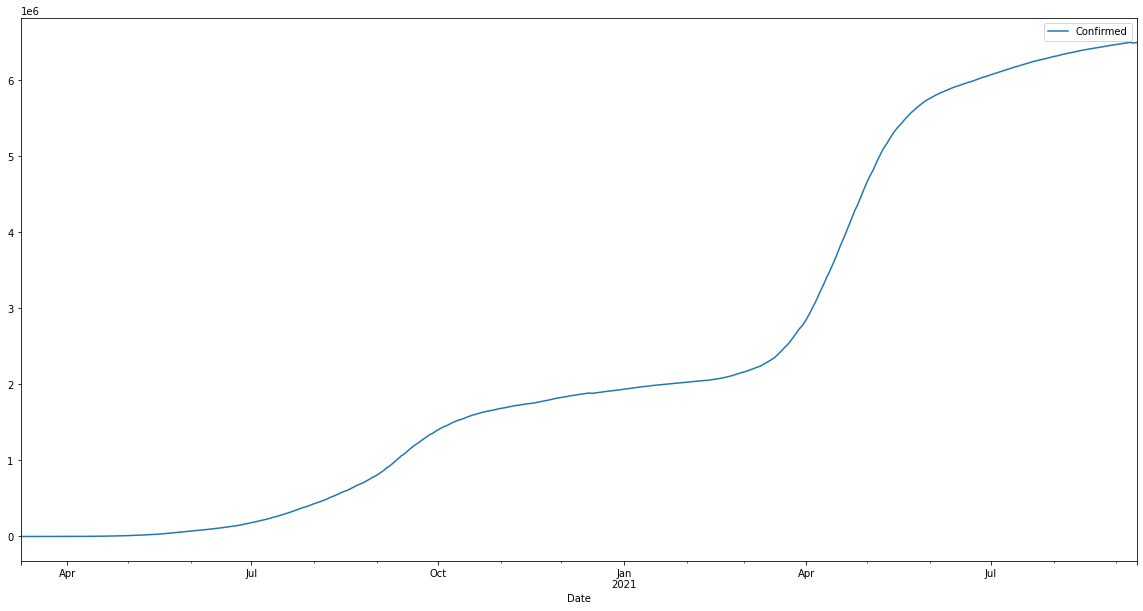

In [16]:
mhData.plot(kind='line',x="Date",y="Confirmed",figsize=(20,10))

<AxesSubplot:xlabel='Date'>

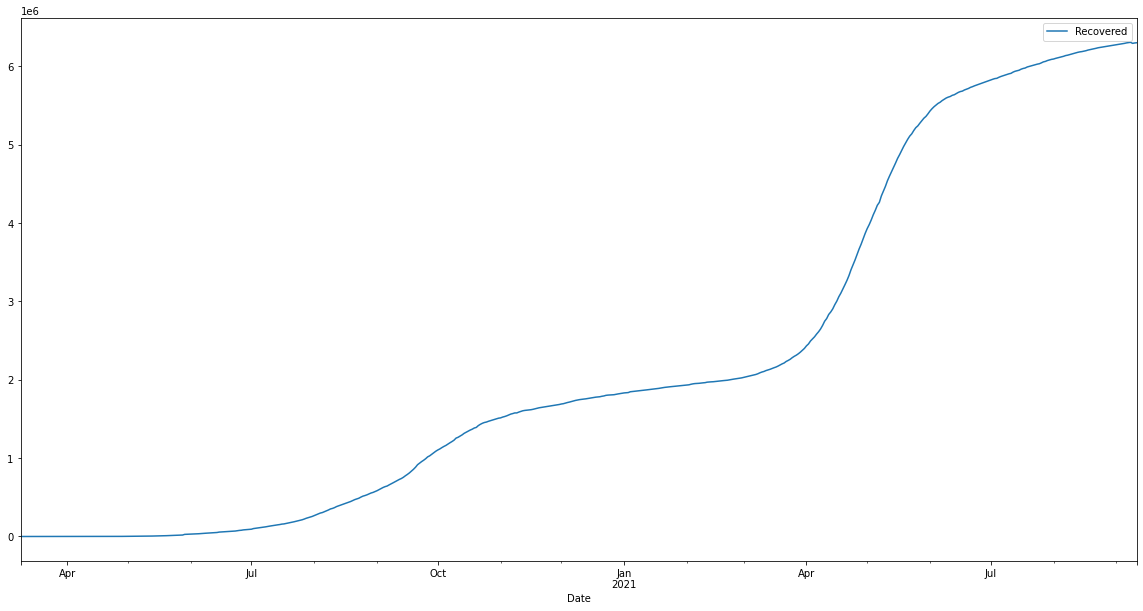

In [17]:
mhData.plot(kind='line',x="Date",y="Recovered",figsize=(20,10))

<AxesSubplot:xlabel='Date'>

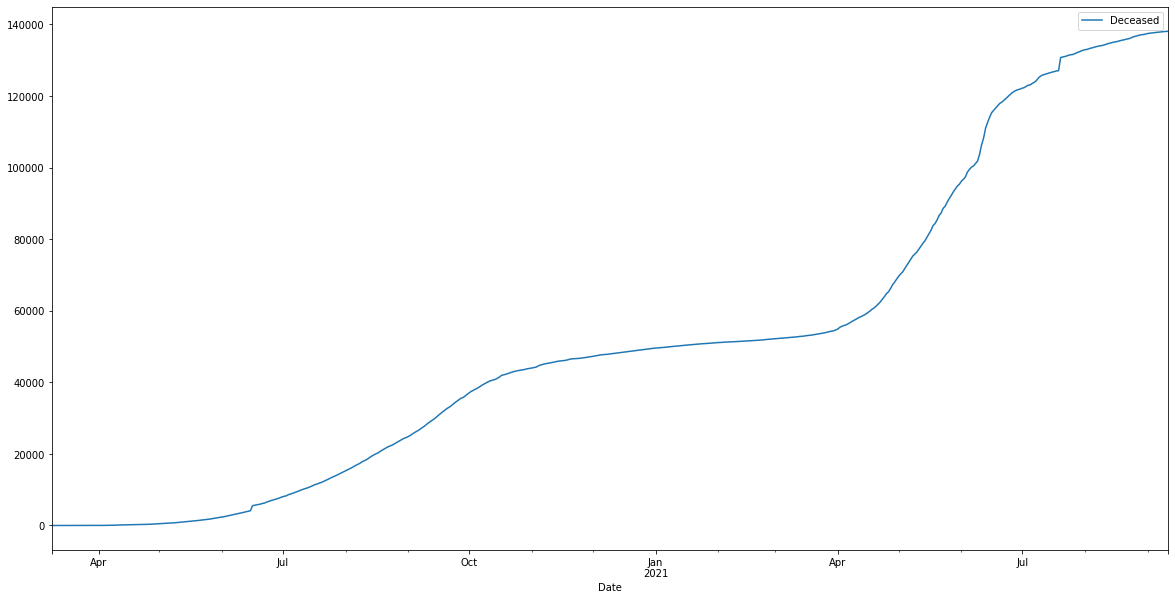

In [18]:
mhData.plot(kind='line',x="Date",y="Deceased",figsize=(20,10))

<AxesSubplot:xlabel='Date'>

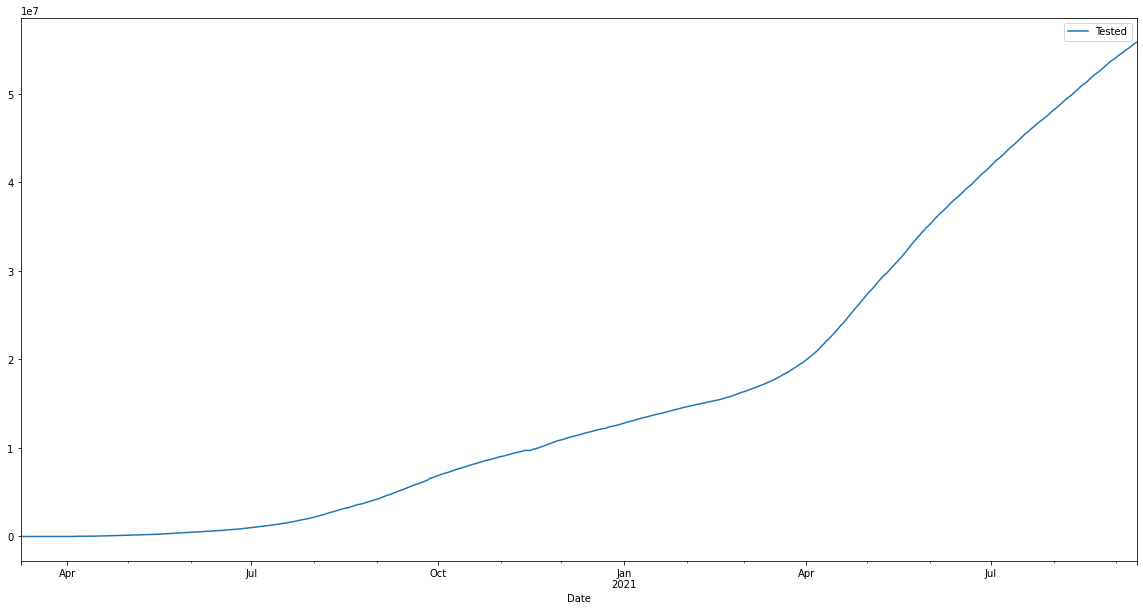

In [19]:
mhData.plot(kind='line',x="Date",y="Tested",figsize=(20,10))

In [20]:
mhData['Date']

11119   2020-03-09
11120   2020-03-10
11121   2020-03-11
11122   2020-03-12
11123   2020-03-13
           ...    
11666   2021-09-07
11667   2021-09-08
11668   2021-09-09
11669   2021-09-10
11670   2021-09-11
Name: Date, Length: 552, dtype: datetime64[ns]

In [21]:
x=mhData['Date']
y=mhData['Active']

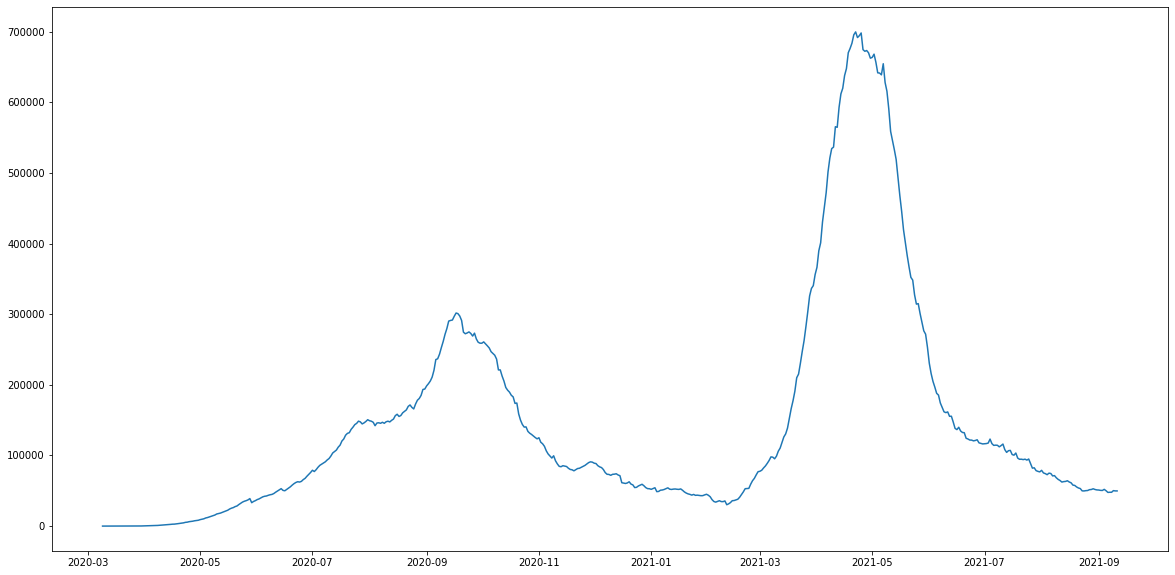

In [22]:
plt.rcParams['figure.figsize'] = [20,10]

plt.plot(x,y)

In [23]:
mhData

,Date,State,Confirmed,Recovered,Deceased,Other,Tested,Active
11119,2020-03-09,Maharashtra,2,0,0,0,0.0,2
11120,2020-03-10,Maharashtra,5,0,0,0,0.0,5
11121,2020-03-11,Maharashtra,11,0,0,0,0.0,11
11122,2020-03-12,Maharashtra,14,0,0,0,0.0,14
11123,2020-03-13,Maharashtra,17,0,0,0,0.0,17
...,...,...,...,...,...,...,...,...
11666,2021-09-07,Maharashtra,6493698,6304336,137897,3539,55159364.0,47926
11667,2021-09-08,Maharashtra,6497872,6308491,137962,3539,55338772.0,47880
11668,2021-09-09,Maharashtra,6487025,6295236,138017,3543,55519679.0,50229
11669,2021-09-10,Maharashtra,6491179,6299760,138061,3546,55702628.0,49812


In [24]:
mhLabels=mhData['Confirmed']

In [25]:
mhLabels

11119          2
11120          5
11121         11
11122         14
11123         17
          ...   
11666    6493698
11667    6497872
11668    6487025
11669    6491179
11670    6494254
Name: Confirmed, Length: 552, dtype: int64

In [26]:
mhData=mhData.drop(['State','Recovered','Deceased','Other','Tested','Active','Confirmed'],axis=1)

In [27]:
mhData

,Date
11119,2020-03-09
11120,2020-03-10
11121,2020-03-11
11122,2020-03-12
11123,2020-03-13
...,...
11666,2021-09-07
11667,2021-09-08
11668,2021-09-09
11669,2021-09-10


In [30]:
mhData['Date']=mhData['Date'].map(datetime.datetime.toordinal)

In [31]:
mhfeatures=mhData.to_numpy()

In [32]:
mhfeatures

array([[737493],
       [737494],
       [737495],
       [737496],
       [737497],
       [737498],
       [737499],
       [737500],
       [737501],
       [737502],
       [737503],
       [737504],
       [737505],
       [737506],
       [737507],
       [737508],
       [737509],
       [737510],
       [737511],
       [737512],
       [737513],
       [737514],
       [737515],
       [737516],
       [737517],
       [737518],
       [737519],
       [737520],
       [737521],
       [737522],
       [737523],
       [737524],
       [737525],
       [737526],
       [737527],
       [737528],
       [737529],
       [737530],
       [737531],
       [737532],
       [737533],
       [737534],
       [737535],
       [737536],
       [737537],
       [737538],
       [737539],
       [737540],
       [737541],
       [737542],
       [737543],
       [737544],
       [737545],
       [737546],
       [737547],
       [737548],
       [737549],
       [737550],
       [737551

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from joblib import dump,load

In [34]:
model=RandomForestRegressor()

In [35]:
model.fit(mhfeatures,mhLabels)

RandomForestRegressor()

484


In [38]:
model.predict([[738043]])

array([6490794.79])

In [41]:
data[data.State=="Maharashtra"]

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
11119,2020-03-09,Maharashtra,2,0,0,0,0.0
11120,2020-03-10,Maharashtra,5,0,0,0,0.0
11121,2020-03-11,Maharashtra,11,0,0,0,0.0
11122,2020-03-12,Maharashtra,14,0,0,0,0.0
11123,2020-03-13,Maharashtra,17,0,0,0,0.0
...,...,...,...,...,...,...,...
11666,2021-09-07,Maharashtra,6493698,6304336,137897,3539,55159364.0
11667,2021-09-08,Maharashtra,6497872,6308491,137962,3539,55338772.0
11668,2021-09-09,Maharashtra,6487025,6295236,138017,3543,55519679.0
11669,2021-09-10,Maharashtra,6491179,6299760,138061,3546,55702628.0
